In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('7winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [38]:
df['quality'].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

***Classification:***
- *Bad wine: quality <= 5*
- *Good wine: quality >= 6*

In [39]:
#Converting into binary classification:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
df['quality_label'].value_counts(normalize=True)

quality_label
1    0.534709
0    0.465291
Name: proportion, dtype: float64

In [40]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


***1 → Good wine***<br>
***0 → Bad wine***

> *Dataset is imbalanced → we must use stratify + proper metrics*

In [41]:
X = df.drop(['quality', 'quality_label'], axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [42]:
y = df['quality_label']
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality_label, Length: 1599, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [45]:
#Classifiers:
models = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "SVM": SVC(kernel="rbf", probability=True),
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}


In [46]:
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    })

In [47]:
df_results = pd.DataFrame(results).sort_values("F1", ascending=False)
df_results

,Model,Accuracy,Precision,Recall,F1
2,RandomForest,0.809375,0.831325,0.807018,0.818991
3,GradientBoosting,0.790625,0.829114,0.766082,0.796353
1,SVM,0.762500,0.814570,0.719298,0.763975
0,LogisticRegression,0.740625,0.768293,0.736842,0.752239


***Use F1 score, not accuracy (imbalanced data).***

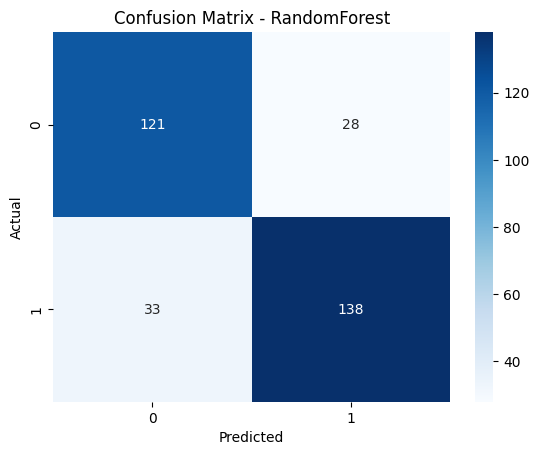

In [48]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix

best_model_name = df_results.iloc[0]['Model']
best_model = models[best_model_name]

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", best_model)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


In [53]:
#Feature importance
importances = pipeline.named_steps['model'].feature_importances_
    
feat_imp = pd.DataFrame({
        "Feature": X.columns,
        "Importance": importances
    }).sort_values("Importance", ascending=False)

feat_imp

,Feature,Importance
10,alcohol,0.177728
9,sulphates,0.136851
1,volatile acidity,0.113564
6,total sulfur dioxide,0.100091
7,density,0.088774
4,chlorides,0.072264
0,fixed acidity,0.068470
8,pH,0.065669
2,citric acid,0.063083
5,free sulfur dioxide,0.058454


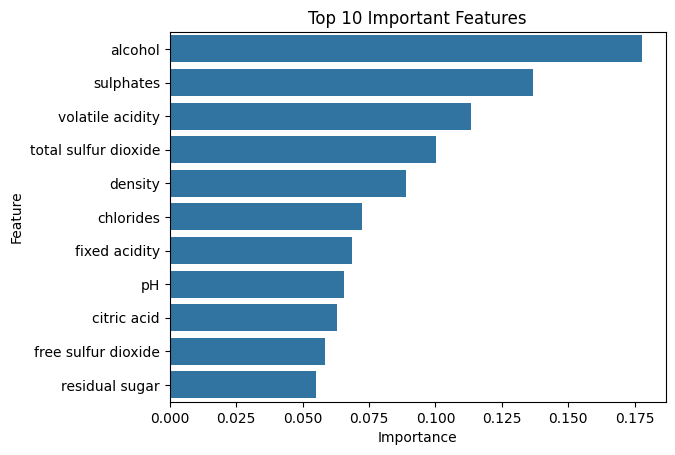

In [50]:
sns.barplot(
    x="Importance",
    y="Feature",
    data=feat_imp
)
plt.title("Top 10 Important Features")
plt.show()

***Hyperparameter Tuning (GridSearchCV):***

In [ ]:
from sklearn.model_selection import GridSearchCV

#GScv for RF:
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=42, n_jobs=-1))
])

rf_param_grid = {
    "rf__n_estimators": [200, 400],
    "rf__max_depth": [None, 10, 20],
    "rf__min_samples_split": [2, 5],
    "rf__min_samples_leaf": [1, 2]
}

rf_grid = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best RF params:", rf_grid.best_params_)
print("Best RF F1:", rf_grid.best_score_)


Best RF params: {'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 400}
Best RF F1: 0.8221066801156169


In [ ]:
#GScv for SVM: 
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(probability=True))
])

svm_param_grid = {
    "svm__C": [0.1, 1, 10],
    "svm__gamma": ["scale", 0.01, 0.1],
    "svm__kernel": ["rbf"]
}

svm_grid = GridSearchCV(
    svm_pipeline,
    svm_param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

svm_grid.fit(X_train, y_train)

print("Best SVM params:", svm_grid.best_params_)
print("Best SVM F1:", svm_grid.best_score_)


Best SVM params: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best SVM F1: 0.776614093269767


***ROC-AUC Curve:***
<br>*ROC-AUC tells how well the model separates classes*

ROC-AUC: 0.9038031319910516


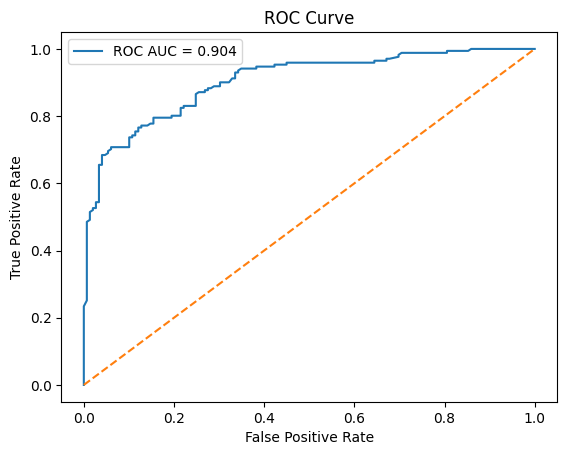

In [57]:
from sklearn.metrics import roc_auc_score, roc_curve

best_model = rf_grid.best_estimator_  # or svm_grid.best_estimator_

y_probs = best_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


***ROC-AUC > 0.8 = strong model:***

In [61]:
#XGBoost Model:
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb", xgb_model)
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.81      0.84      0.83       149
           1       0.86      0.83      0.84       171

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.84      0.83      0.83       320



| Rank | Model               |
| ---- | ------------------- |
| 1   | XGBoost             |
| 2   | RF                  |
| 3   | Tuned SVM           |

